# 03 Norm and distance

<img src="figs/03_dist_points.png" alt="Drawing" width=450px/>

<center>Distance between pathological and healthy</center>

<center><img src="figs/03_dist_brains.png" alt="Drawing" width=370px/></center>
<center><img src="figs/03_dist_conn.png" alt="Drawing" width=370px/></center>

#### Unit 1: Vectors, Textbook Ch. 1-5
- 01 Vectors
- 02 Linear Functions
- **_03 Norms and Distances_**
- 04 Clustering
- 05 Linear Independence

#### Unit 2: Matrices, Textbook Ch. 6-11
#### Unit 3: Least Squares, Textbook Ch. 12-14 


##### Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- [Angle](#sec-angle)
- [Mean](#sec-sd)
- [Mean Square, Root Mean Square](#sec-sd)
- [Standard deviation](#sec-sd)

##### Outline: 03 Norms and Distances

- **[Norm](#sec-norm)**
- [Distance](#sec-distance)
- [Angle](#sec-angle)
- [Mean](#sec-sd)
- [Mean Square, Root Mean Square](#sec-sd)
- [Standard deviation](#sec-sd)

### Norm

$\color{#EF5645}{\text{Definition}}$: The _Euclidean norm_, or just _norm_, of an $n$-vector $x$ is:
$$||x|| = \sqrt{x_1^2 + ... + x_n^2} = \sqrt{x^Tx}.$$

$\color{#EF5645}{\text{Remark}}$: The norm is equal to the absolute value for $n=1$.

$\color{#047C91}{\text{Exercise}}$: Compute the norm of $x= (1, 1, 1)$.

### Properties of the Norm

$\color{#6D7D33}{\text{Properties}}$: For any scalar $\beta$ and any $n$-vectors $x, y$:
1. Homogeneity: $||\beta x|| = |\beta|||x||$
2. Triangle inequality: $$||x+y|| \leq ||x|| + ||y||$$
3. Nonnegative: $||x|| \geq 0$
4. Definite: $||x|| = 0$ if and only if $x = 0$

$\color{#003660}{\text{In Python}}$, the module `linalg` from the package `numpy` has a function called `norm`.

In [2]:
import numpy as np

x = np.array([2, -1, 2])

print(np.linalg.norm(x))

3.0


##### Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- **[Distance](#sec-distance)**
- [Angle](#sec-angle)
- [Mean](#sec-sd)
- [Mean Square, Root Mean Square](#sec-sd)
- [Standard deviation](#sec-sd)

### Distance

$\color{#EF5645}{\text{Definition}}$: The _Euclidean distance_, or just _distance_, between $n$-vectors $a$ and $b$ is:
$$dist(a, b) = ||a - b||.$$

$\color{#EF5645}{\text{Remark}}$: This definition agrees with ordinary distance for $n = 1, 2, 3.$

$\color{#003660}{\text{In Python}}$, we can compute distances using `linalg.norm`.

1.4142135623730951


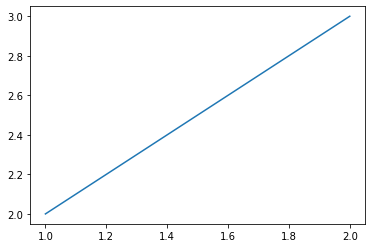

In [8]:
import matplotlib.pyplot as plt
a = np.array([1, 2]); b = np.array([2, 3])
distance_ab = np.linalg.norm(a - b); print(distance_ab)
plt.plot([a[0], b[0]], [a[1], b[1]]);

### Interpretation: Triangle inequality

$\color{#EF5645}{\text{Recall}}$: Triangle inequality: 
$$||x+y|| \leq ||x|| + ||y||.$$

Apply with: $x = a - b$ and $y = b - c$ and get:
$$||a - c|| \leq ||a - b|| + ||b - c||.$$
i.e. third edge is shorter than the sum of the other two.
<center><img src="figs/03_triangle.jpg" alt="Drawing" width=350px/></center>

$\color{#003660}{\text{In Python}}$, we can use a distance to compute differences between more complex data.

$\color{#047C91}{\text{Example}}$: Load brain connectomes data from the package `geomstats`.

In [14]:
import geomstats.datasets.utils as ds

data, patient_ids, labels = ds.load_connectomes()

Given $N$ brain areas: a _brain connectome_ is a $N \times N$ table where a value at row $i$ and column $j$ quantifies whether areas $i$ and $j$ are generally activated together.

We show connectome using colors with `imshow`.

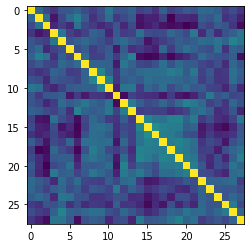

In [19]:
plt.imshow(data[0]);#print(data[0])

We verify that two schizophrenic subjects are "closer" than a schizophrenic subject and a healthy control.

In [25]:
print(labels[0:3])
healthy = data[0]; schiz1 = data[1]; schiz2 = data[2]
print(
    "healthy-schiz:", np.linalg.norm(healthy - schiz1))
print(
    "schiz-schiz: ", np.linalg.norm(schiz1 - schiz2))

[1 0 0]
healthy-schiz: 5.281496613975049
schiz-schiz:  4.461061135669169


### Nearest Neighbor

$\color{#EF5645}{\text{Definition}}$: Consider $z_1, . . . , z_m$ a list of $n$-vectors. We say that $z_j$ is the _nearest neighbor of the $n$-vector $x$_ if:
$$‖x − z_j ‖ ≤ ‖x − z_i ‖,$$
for all $i = 1, . . . , m$.

<center><img src="figs/03_nn.jpg" alt="default" width=300px/></center>

$\color{#047C91}{\text{Exercise}}$: Design an algorithm that can predict if a subject is schizophrenic or not, from its connectome.

##### Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- **[Angle](#sec-angle)**
- [Mean](#sec-sd)
- [Mean Square, Root Mean Square](#sec-sd)
- [Standard deviation](#sec-sd)

### Angle

$\color{#EF5645}{\text{Definition}}$: The _angle_ between two non-zeros $n$-vectors $a$ and $b$ is:
$$\angle(a, b) = arccos( \frac{a^Tb}{||a||||b||} ).$$

$\color{#EF5645}{\text{Remark}}$: It coincides with the ordinary angle in 2D and 3D.

Write: $\theta = \angle(a, b)$ 
- $θ = π/2 = 90^\circ$: a, b are _orthogonal_: $a ⊥ b$ ($a^T b = 0$) 
- $θ = 0$: a, b are _aligned_ ($a^T b = ‖a‖ ‖b‖$) 
- $θ = π = 180^\circ$: a, b are _anti-aligned_ ($a^T b = −‖a‖ ‖b‖$)
- $θ ≤ π/2 = 90^\circ$: a, b make an _acute angle_ ($a^T b ≥ 0$)
- $θ ≥ π/2 = 90^\circ$: a, b make an _obtuse angle_ ($a^T b ≤ 0$)

<center><img src="figs/03_angles.jpg" alt="default"/></center>

$\color{#003660}{\text{In Python}}$:

In [37]:
import numpy as np
def angle(a, b):
    product = np.linalg.norm(a)* np.linalg.norm(b)
    fraction = np.inner(a, b) / (product)
    return np.arccos(fraction)

a = [1, 0]
b = [0, 1]

print(angle(a, b))
print(np.pi / 2)

1.5707963267948966
1.5707963267948966


### Cauchy-Schwarz Inequality

$\color{#6D7D33}{\text{Properties}}$: The angle $\angle(a, b)$ is the number in $[0, \pi]$ that satisfies: 
$$a^Tb = ||a||||b||\cos(\angle(a, b)).$$

$\color{#6D7D33}{\text{Theorem}}$: For any two $n$-vectors $a$ and $b$, we have the Cauchy-Schwarz inequality:
$$|a^Tb| \leq ||a||||b||.$$

##### Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- [Angle](#sec-angle)
- **[Mean](#sec-sd)**
- [Mean Square, Root Mean Square](#sec-sd)
- [Standard deviation](#sec-sd)

### Mean Value

$\color{#EF5645}{\text{Definition}}$: The _mean value_, or _average_ of an $n$-vector $x$ is:
$$\bar{x} = \frac{x_1 + ... + x_n}{n}.$$


$\color{#047C91}{\text{Example}}$: Consider the vector of the blood pressures of a patient recorded every 4 hours during a day $x = (110, 100, 108, 100, 104, 100)$. (in mmHg). Compute the average blood pressure of the patient.

$\color{#003660}{\text{In Python}}$, we use the function `average` from `numpy`.

In [26]:
x = np.array([110, 100, 108, 100, 104, 100])
np.average(x)

103.66666666666667

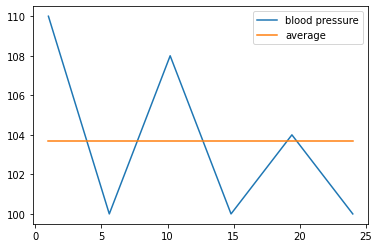

In [35]:
import matplotlib.pyplot as plt

hours = np.linspace(1, 24, 6)
plt.plot(hours, x, label="blood pressure")
plt.plot(hours, (np.average(x)) * np.ones(len(x)), label="average")
plt.legend();

##### Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- [Angle](#sec-angle)
- [Mean](#sec-sd)
- **[Mean Square, Root Mean Square](#sec-sd)**
- [Standard deviation](#sec-sd)

### Root Mean Square (RMS) value

$\color{#EF5645}{\text{Definition}}$: The _mean-square value_ of an $n$-vector $x$ is:
$$\frac{x_1^2 + ... + x_n^2}{n} = \frac{||x||^2}{n}.$$

$\color{#EF5645}{\text{Definition}}$: The _root-mean-square (RMS) value_ of an $n$-vector $x$ is:
$$\text{RMS}(x) = \sqrt{\frac{x_1^2 + ... + x_n^2}{n}} = \frac{||x||}{\sqrt{n}}.$$

$\color{#EF5645}{\text{Remark}}$: RMS(x) gives "typical" values of $|x_i|$.

$\color{#047C91}{\text{Exercise}}$: Write a function computing the root-mean-square value in Python.

In [27]:
def rms(x):
    return np.linalg.norm(x) / np.sqrt(len(x))

# The rms gives typical values:
ones = np.ones(4)
rms(ones)

1.0

##### Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- [Angle](#sec-angle)
- [Mean](#sec-sd)
- [Mean Square, Root Mean Square](#sec-sd)
- **[Standard deviation](#sec-sd)**

### Standard Deviation

$\color{#EF5645}{\text{Definition}}$: The _standard deviation_ of the $n$-vector $x$ is:
$$std(x) = rms(x - \bar{x}1) = \frac{||x - \bar{x}.1_n ||}{\sqrt{n}},$$
where $\bar{x}$ is the average of $x$.

$\color{#EF5645}{\text{Remark:}}$ The standard deviation gives the typical amount that $x_i$ varies around $\bar{x}.$

$\color{#6D7D33}{\text{Properties}}$:
1. $std(x) = 0$ if and only if $x = \alpha1$ for some scalar $\alpha$.
2. We have: $rms(x)^2 = \bar{x}^2 + std(x)^2$

### Example: Finance

- $x$: timeseries of returns on an investment (say, in %),
- $\bar{x}$: "mean return" over the time period,
- $std(x)$: how variable is the return = the "risk".

Multiple investments (with different return timeseries $x$) are:
- compared in terms of return and risk.


<center><img src="figs/03_finance.jpg" alt="default" width=900px/></center>

##### Outline: 03 Norms and Distances

- [Norm](#sec-norm)
- [Distance](#sec-distance)
- [Angle](#sec-angle)
- [Mean](#sec-sd)
- [Mean Square, Root Mean Square](#sec-sd)
- [Standard deviation](#sec-sd)

Resources: Textbook Ch. 3